# Linear Regression
Linear regression is a model of the form $p(y|w^T\textbf{x})=\mathcal{N}(y|w^T\textbf{x}, \sigma^2)$, where *w* is the coefficient that can be used to predict a new datapoint $X_i\in \textbf{X}$: $Y_i = X_i^Tw$. We can use **least square estimation** to evaluate the best *w*. Define least square error to be:
$$l(\textbf{X})=\frac{1}{2}|y-\textbf{X}w|^2_2 = \frac{1}{2}(y-\textbf{X}w)^T(y-\textbf{X}w).$$
Setting the gradient of $l(\textbf{X})$ with respect to $w$, we get $$\frac{\partial l(\textbf{X})}{\partial w}=\textbf{X}^T\textbf{X}w-\textbf{X}^Ty=0.$$
Then we can solve for *w* and this is called its **ordinary least square (OLS)** solution:
$$\hat w=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^Ty.$$

## Ridge Regression
Sometimes $(\textbf{X}^T\textbf{X})^{-1}$ is singular and does not have an inverse; in this case we need to add an additional matrix $\alpha \textbf{I}$ to $\textbf{X}^T\textbf{X}$ so that its non-singular. Then the coefficient can be calculated as:
$$\hat w=(\textbf{X}^T\textbf{X}+\alpha \textbf{I})^{-1}\textbf{X}^Ty.$$
Ridge regression minimizes the biased square error, with a penalty term $\alpha|w|^2_2$:
$$l(\textbf{X})=\frac{1}{2}\big(|y-\textbf{X}w|^2_2+\alpha|w|^2_2\big).$$
The constraint for ridge regresesion is $|w|^2\leq \alpha$. We can use $\alpha$ to impose a maximum value on the magnitude of *w*. When $\alpha$ is large, the bias term dominates, and *w* gets closer to 0. The relationship of *w* and $\alpha$ can be shown as follows:

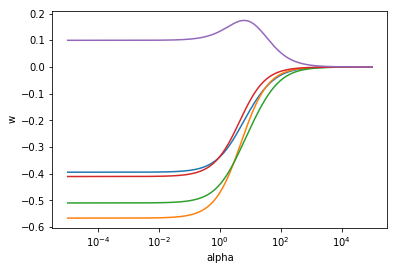

In [23]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randn(10, 5)
Y = np.random.randn(10)
alphas = np.logspace(-5, 5, 200)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('w')
plt.show()

In `Ridge.py`, implement ridge regressor. We can insert an "intercept" column of 1s at the front of input $\textbf{X}$ so that the computed $w$ using OLS solution contains intercept vector as its first column. This can be done by the following line of code:
```
X = np.column_stack([np.ones(len(X)), X])
```

The function `load_lm` in the following test case generated $x, y$ pairs along the line $y=x$:

In [3]:
from Ridge import *

train_x, train_y, test_x, test_y = util.load_lm(slope=1, intercept=0, sd=0, n=10)
model = Ridge(alpha=0.0)
model.fit(test_x, test_y)
print(model.w)

[5.68434189e-14 1.00000000e+00]


When $\alpha=0$, the penalty term is negligible and the linear model is $y=x$. Verify it by printing out $w$. Note that first term is intercept and second term is slope. Finally, we can use sklearn to train in the diabetes dataset using ridge regressor. Description of the dataset can be found [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst). We choose body mass index (`x[2]`) and fit a linear model against disease progression (`y`).

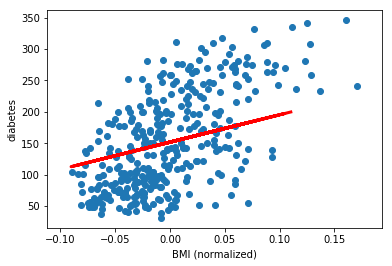

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

# load diabetes dataset
def load_diabetes():
    data, target = datasets.load_diabetes(return_X_y=True)
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2)
    return x_train, y_train, x_test, y_test

train_x, train_y, test_x, test_y = load_diabetes()
train_x, test_x = train_x[:,np.newaxis,2], test_x[:,np.newaxis, 2]
model = Ridge()
model.fit(train_x, train_y)
pred = model.predict(test_x)
plt.scatter(train_x, train_y)
plt.plot(test_x, pred, color='red', linewidth=3)
plt.xlabel('BMI (normalized)')
plt.ylabel('diabetes')
plt.show()

## Lasso Regression*
Another shrinkage technique of the linear regression model is called lasso. Lasso regression minimizes the biased square error, with a different penalty term $\alpha|w|_1$:
$$l(\textbf{X})=\frac{1}{2}\big(|y-\textbf{X}w|^2_2+\alpha|w|_1\big).$$
The constraint for lasso regressor is $|w|\leq \alpha$.
Since the constraint has changed for lasso, we can no longer solve for an analytical form like that in the ridge regression. Instead, we can use a technique called **coordinate descent** to approximate *w*:

1. Initialize w = 0.
2. Calculate intercept $b=\frac{\textbf{Y}-\textbf{X}^Tw}{N}$.
3. For each iteration do:
    * Calculate partial residuals $r_{ij}=y_i-\sum_{k \neq j}x_{ik}w_k$.
    * Compute simple least squares coefficient of partial residuals on $w_j$: $w_j^*=\frac{1}{N}\sum_{i=1}^N x_{ij}r_{ij}$.
    * Apply soft thresholding on $w_j$.
    * Update intercept $b=\frac{\textbf{Y}-\textbf{X}^Tw}{N}$.

Soft thresholding recovers the regression function from noisy input:
$$
s(x, \lambda) = \left\{
        \begin{array}{ll}
            0 & \quad |x| \leq \lambda \\
            x-\lambda \text{sgn}(x) & \quad o.w.
        \end{array}
    \right.
$$

In `Lasso.py`, complete lasso regressor. As discussed before, intercept term can be conveniently stacked in front of $\textbf{X}$. To test your code:

In [4]:
from Lasso import *

train_x, train_y, test_x, test_y = util.load_lm(slope=1, intercept=0, sd=0, n=10)
model = Ridge(alpha=0.0)
model.fit(test_x, test_y)
print(model.w)

[-2.27373675e-13  1.00000000e+00]


The result should be very similar to what we had before. We may use sklearn to build a lasso regressor:

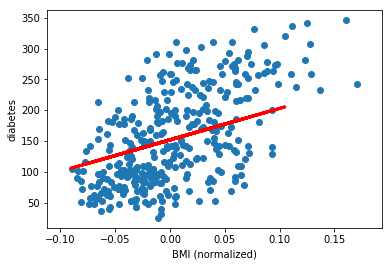

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# load diabetes dataset
def load_diabetes():
    data, target = datasets.load_diabetes(return_X_y=True)
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2)
    return x_train, y_train, x_test, y_test

train_x, train_y, test_x, test_y = load_diabetes()
train_x, test_x = train_x[:,np.newaxis,2], test_x[:,np.newaxis, 2]
model = Lasso()
model.fit(train_x, train_y)
pred = model.predict(test_x)
plt.scatter(train_x, train_y)
plt.plot(test_x, pred, color='red', linewidth=3)
plt.xlabel('BMI (normalized)')
plt.ylabel('diabetes')
plt.show()